<a href="https://colab.research.google.com/github/SiriSathish600/AI/blob/main/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best state (Queen positions): [6, 0, 5, 1, 4, 7, 3, 2], Number of conflicts: 1


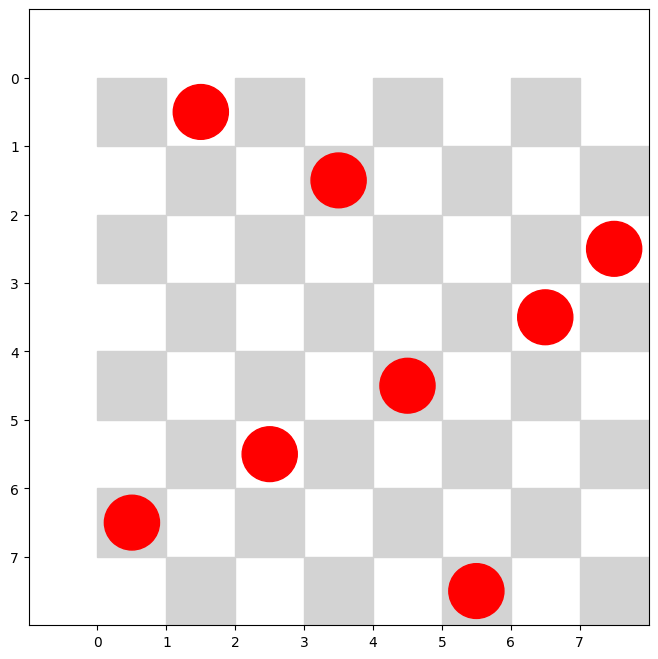

In [22]:
import random
import math
import matplotlib.pyplot as plt

def create_initial_solution(n):
    return random.sample(range(n), n)

def calculate_fitness(state):
    n = len(state)
    row_conflicts = sum([state.count(i) - 1 for i in state])
    diagonal_conflicts = 0

    for i in range(n):
        for j in range(i + 1, n):
            if abs(state[i] - state[j]) == abs(i - j):
                diagonal_conflicts += 1

    return row_conflicts + diagonal_conflicts

def random_neighbor(state):
    neighbor = state[:]
    i = random.randint(0, len(state) - 1)
    neighbor[i] = random.randint(0, len(state) - 1)
    return neighbor

def simulated_annealing(n, initial_temp=1000, cooling_rate=0.95, max_iterations=1000):
    current_solution = create_initial_solution(n)
    current_fitness = calculate_fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor = random_neighbor(current_solution)
        neighbor_fitness = calculate_fitness(neighbor)

        fitness_diff = neighbor_fitness - current_fitness

        if fitness_diff < 0 or random.uniform(0, 1) < math.exp(-fitness_diff / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

            if current_fitness < best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        temperature *= cooling_rate

    return best_solution, best_fitness

def plot_solution(solution):
    n = len(solution)
    plt.figure(figsize=(n, n))
    plt.xlim(-1, n)
    plt.ylim(-1, n)

    # Draw the chessboard
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='lightgrey'))

    # Place the queens
    for col, row in enumerate(solution):
        plt.gca().add_patch(plt.Circle((col + 0.5, row + 0.5), 0.4, color='red'))

    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# Parameters
n = 8  # Number of queens
best_solution, best_fitness = simulated_annealing(n)

# Output results
print(f"Best state (Queen positions): {best_solution}, Number of conflicts: {best_fitness}")

# Plot the solution
plot_solution(best_solution)


Best state (Queen positions): [4, 0, 7, 5, 2, 6, 1, 3], Number of conflicts: 0


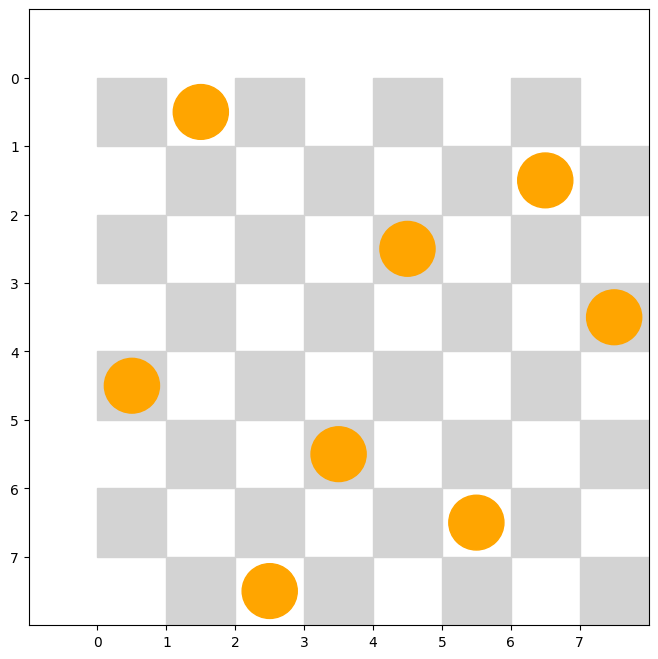

In [56]:
import random
import math
import matplotlib.pyplot as plt

def create_initial_solution(n):
    return random.sample(range(n), n)

def calculate_fitness(state):
    n = len(state)
    row_conflicts = sum([state.count(i) - 1 for i in state])
    diagonal_conflicts = 0

    for i in range(n):
        for j in range(i + 1, n):
            if abs(state[i] - state[j]) == abs(i - j):
                diagonal_conflicts += 1

    return row_conflicts + diagonal_conflicts

def random_neighbor(state):
    neighbor = state[:]
    i = random.randint(0, len(state) - 1)
    neighbor[i] = random.randint(0, len(state) - 1)
    return neighbor

def simulated_annealing(n, initial_temp=1000, cooling_rate=0.95, max_iterations=10000):
    current_solution = create_initial_solution(n)
    current_fitness = calculate_fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor = random_neighbor(current_solution)
        neighbor_fitness = calculate_fitness(neighbor)

        fitness_diff = neighbor_fitness - current_fitness

        if fitness_diff < 0 or random.uniform(0, 1) < math.exp(-fitness_diff / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

            if current_fitness < best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        # Stop if a valid solution is found
        if best_fitness == 0:
            break

        temperature *= cooling_rate

    return best_solution, best_fitness

def plot_solution(solution):
    n = len(solution)
    plt.figure(figsize=(n, n))
    plt.xlim(-1, n)
    plt.ylim(-1, n)

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='lightgrey'))

    for col, row in enumerate(solution):
        plt.gca().add_patch(plt.Circle((col + 0.5, row + 0.5), 0.4, color='orange'))

    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# Parameters
n = 8  # Number of queens
best_solution, best_fitness = simulated_annealing(n)

# Output results only if conflicts are zero
if best_fitness == 0:
    print(f"Best state (Queen positions): {best_solution}, Number of conflicts: {best_fitness}")
    # Plot the solution
    plot_solution(best_solution)
else:
    print("No valid solution found within the maximum iterations.")
